In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [140]:
df_aluguel = pd.read_csv('./dataset/dataset_aluguel.csv')

In [141]:
df_aluguel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     100 non-null    int64  
 1   tamanho_m2             100 non-null    float64
 2   n_quartos              100 non-null    int64  
 3   idade_casa             100 non-null    float64
 4   garagem                100 non-null    int64  
 5   localizacao_Periferia  100 non-null    bool   
 6   localizacao_Subúrbio   100 non-null    bool   
 7   valor_aluguel          100 non-null    float64
dtypes: bool(2), float64(3), int64(3)
memory usage: 5.0 KB


In [142]:
df_aluguel.drop(columns=['id'], axis=1, inplace=True)

In [143]:
df_aluguel.columns = [
    'tamanho_metro_quadrado',
    'numero_de_quartos',
    'idade_da_casa',
    'contem_garagem',
    'localizacao_periferia',
    'localizacao_suburbio',
    'valor_do_aluguel'
]

In [144]:
df_aluguel.head(10)

,tamanho_metro_quadrado,numero_de_quartos,idade_da_casa,contem_garagem,localizacao_periferia,localizacao_suburbio,valor_do_aluguel
0,106.181018,1,36.760806,0,True,False,1767.122088
1,192.607146,4,10.453581,1,True,False,3278.742397
2,159.799091,5,27.072399,1,True,False,2953.899737
3,139.798773,4,34.789220,1,False,True,2514.717108
4,73.402796,5,11.427501,0,False,True,1942.164396
5,73.399178,5,8.747746,1,True,False,2141.303241
6,58.712542,3,49.108417,1,True,False,1625.680981
7,179.926422,5,25.831795,0,False,True,2854.591908
8,140.167252,4,13.041459,1,True,False,2702.673542
9,156.210887,5,49.812685,1,False,False,2456.538289


In [145]:
df_aluguel.isna().sum()

tamanho_metro_quadrado    0
numero_de_quartos         0
idade_da_casa             0
contem_garagem            0
localizacao_periferia     0
localizacao_suburbio      0
valor_do_aluguel          0
dtype: int64

In [146]:
df_aluguel.describe()

,tamanho_metro_quadrado,numero_de_quartos,idade_da_casa,contem_garagem,valor_do_aluguel
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,2.910000,25.794810,0.520000,2112.819084
std,44.623412,1.400541,14.348628,0.502117,514.314100
min,50.828318,1.000000,0.259243,0.000000,1192.728727
25%,78.980114,1.750000,13.969405,0.000000,1694.633091
50%,119.621368,3.000000,24.827177,1.000000,2069.395680
75%,159.530468,4.000000,37.252879,1.000000,2520.182679
max,198.033040,5.000000,49.812685,1.000000,3278.742397


<Axes: xlabel='tamanho_metro_quadrado'>

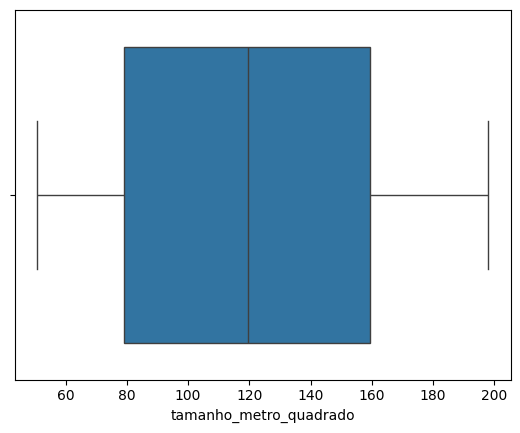

In [147]:
sns.boxplot(data=df_aluguel, x='tamanho_metro_quadrado')

<Axes: xlabel='numero_de_quartos'>

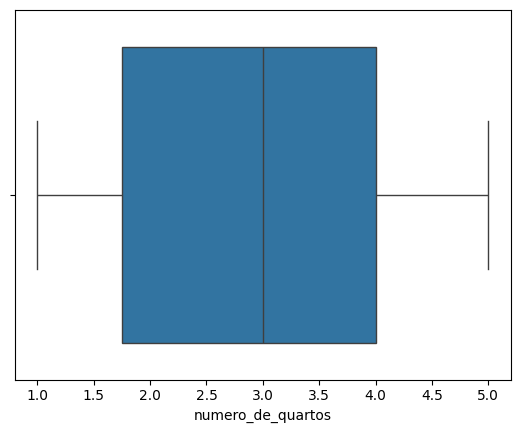

In [148]:
sns.boxplot(data=df_aluguel, x='numero_de_quartos')

<Axes: xlabel='idade_da_casa'>

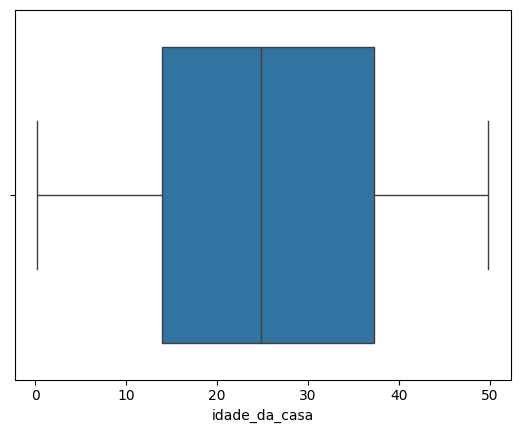

In [149]:
sns.boxplot(data=df_aluguel, x='idade_da_casa')


<Axes: xlabel='valor_do_aluguel'>

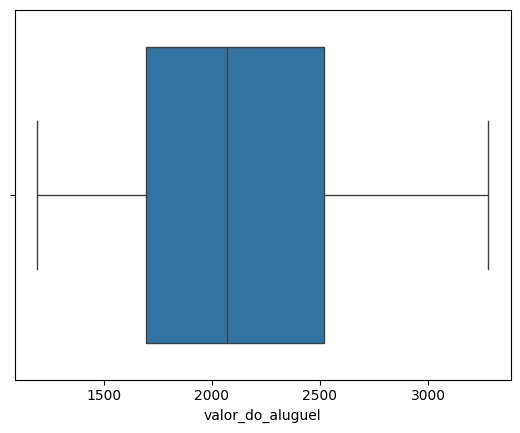

In [150]:
sns.boxplot(data=df_aluguel, x='valor_do_aluguel')


<Axes: xlabel='tamanho_metro_quadrado', ylabel='valor_do_aluguel'>

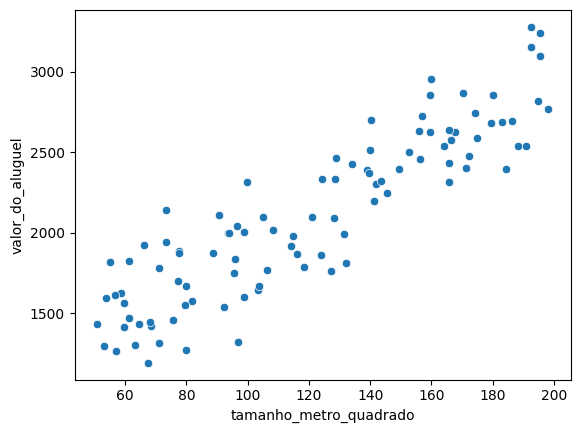

In [151]:
sns.scatterplot(data=df_aluguel, x='tamanho_metro_quadrado', y='valor_do_aluguel')

<Axes: xlabel='numero_de_quartos', ylabel='valor_do_aluguel'>

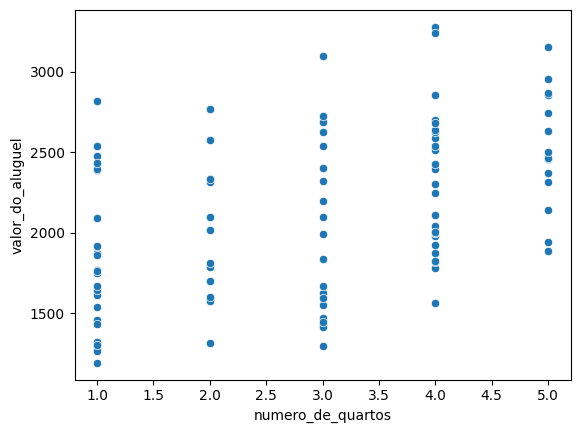

In [152]:
sns.scatterplot(data=df_aluguel, x='numero_de_quartos', y='valor_do_aluguel')

<Axes: >

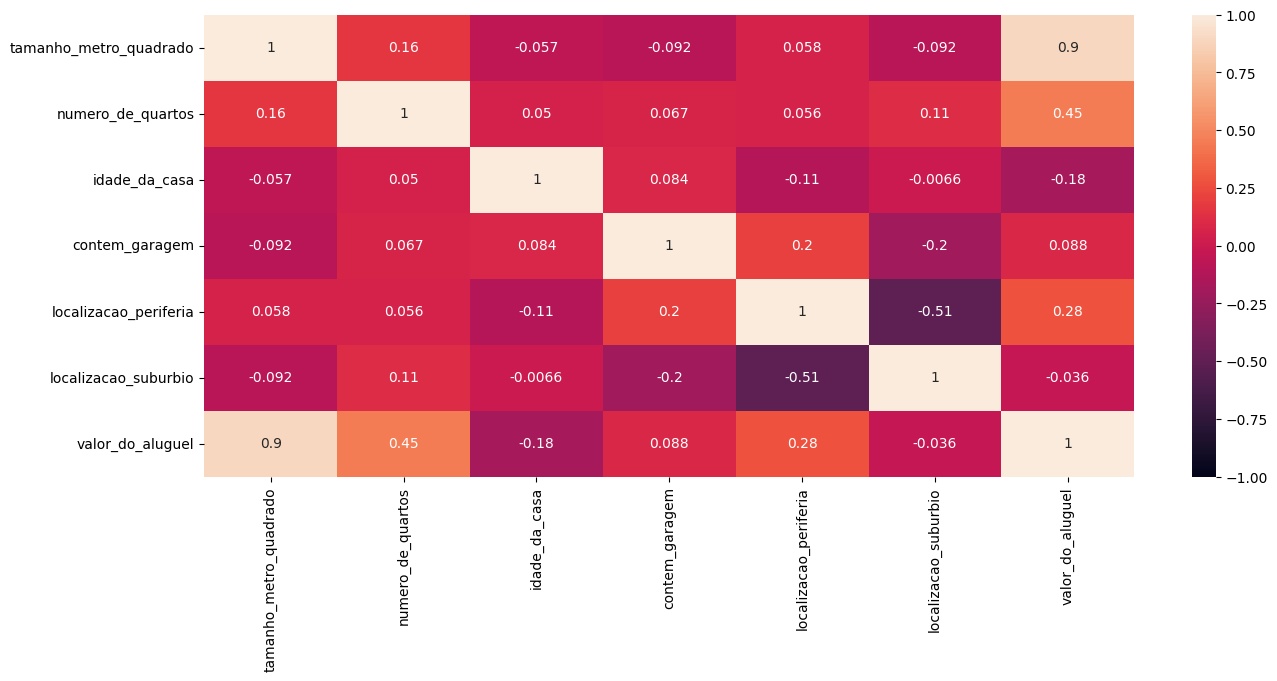

In [154]:
plt.figure(figsize=(15,6))
sns.heatmap(df_aluguel.corr(), vmin=-1, vmax=1, annot=True)

<Axes: >

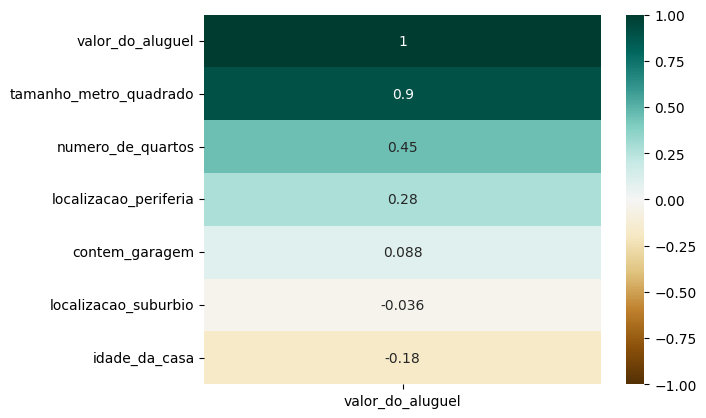

In [155]:

sns.heatmap(df_aluguel.corr()[['valor_do_aluguel']].sort_values(by='valor_do_aluguel', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')

In [156]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error

In [157]:
X = df_aluguel.drop(columns='valor_do_aluguel', axis=1)
y = df_aluguel['valor_do_aluguel']

In [158]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=51)

In [159]:
colunas_numericas = ['tamanho_metro_quadrado','numero_de_quartos', 'idade_da_casa', 'contem_garagem']
colunas_boolean = ['localizacao_periferia', 'localizacao_suburbio']

In [160]:
tranformer_numericas = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [161]:
tranformer_boolean = Pipeline(steps=[
    ('bool_to_int', FunctionTransformer(lambda x: x.astype(int)))
])

In [162]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', tranformer_numericas,colunas_numericas),
        ('cat', tranformer_boolean,colunas_boolean)
    ]
)

In [163]:
model_reg = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', LinearRegression())])

In [164]:
model_reg.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['tamanho_metro_quadrado',
                                                   'numero_de_quartos',
                                                   'idade_da_casa',
                                                   'contem_garagem']),
                                                 ('cat',
                                                  Pipeline(steps=[('bool_to_int',
                                                                   FunctionTransformer(func=<function <lambda> at 0x000002D36DF6CC20>))]),
                                                  ['localizacao_periferia',
                                                   'localizacao_suburbio'])])),
                ('regressor', LinearRegression())])

In [165]:
y_pred = model_reg.predict(X_test)

In [171]:
predicao = {
    'tamanho_metro_quadrado': 106.18101782710437,
    'numero_de_quartos': 1,
    'idade_da_casa': 36.7608059620386,
    'contem_garagem': 0,
    'localizacao_periferia': 1,
    'localizacao_suburbio': 0
}
sample_df = pd.DataFrame(predicao, index=[1])

In [172]:
model_reg.predict(sample_df)

array([1796.35423055])